##Examples of Autoregressive Processes

We will explore three examples of autoregressive (AR) processes with different specifications.

###1. AR(0) Process
An AR(0) process has no dependence on past values. It can be written as:
\begin{equation}
y_t = \epsilon_t,
\end{equation}
where $\epsilon_t \sim N(0, \sigma^2)$.

###2. AR(1) Process
An AR(1) process depends linearly on its immediate past value. For this example, we consider two cases:
\begin{equation}
y_t = 0.2y_{t-1} + \epsilon_t,
\end{equation}
\begin{equation}
y_t = 0.8y_{t-1} + \epsilon_t,
\end{equation}
where $\epsilon_t \sim N(0, \sigma^2)$.

###3. AR(2) Process
An AR(2) process depends linearly on its two most recent past values. For this example, we consider two cases:
\begin{equation}
y_t = 0.2y_{t-1} + 0.2y_{t-2} + \epsilon_t,
\end{equation}
\begin{equation}
y_t = 0.8y_{t-1} - 0.8y_{t-2} + \epsilon_t,
\end{equation}
where $\epsilon_t \sim N(0, \sigma^2)$.

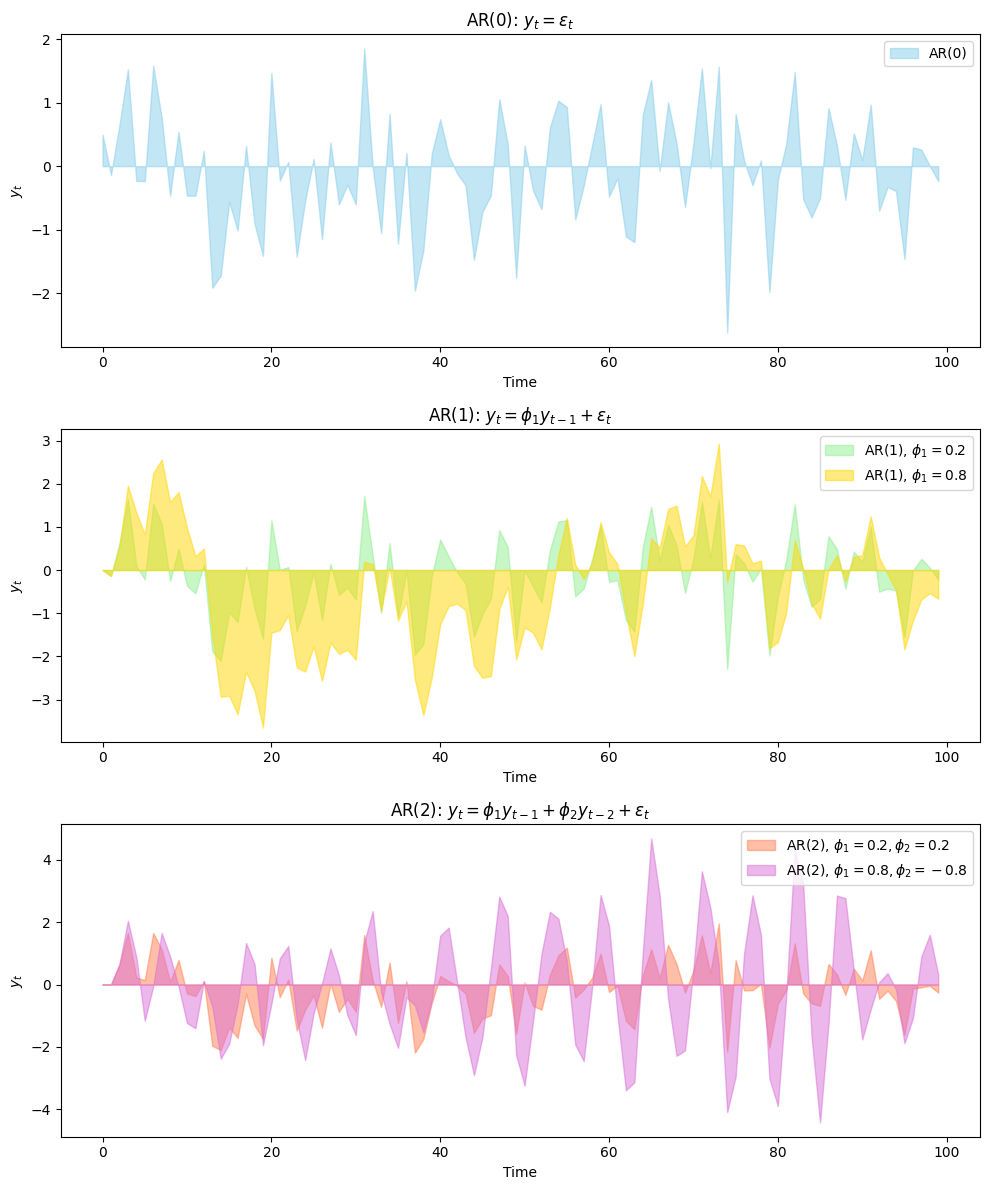

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n = 100  # Number of time steps
np.random.seed(42)  # For reproducibility

# Generate noise
epsilon = np.random.normal(0, 1, n)

# Initialize arrays
y_ar0 = np.zeros(n)
y_ar1_1 = np.zeros(n)
y_ar1_2 = np.zeros(n)
y_ar2_1 = np.zeros(n)
y_ar2_2 = np.zeros(n)

# Generate AR(0) process
y_ar0 = epsilon

# Generate AR(1) processes
phi1_ar1_1 = 0.2
phi1_ar1_2 = 0.8
for t in range(1, n):
    y_ar1_1[t] = phi1_ar1_1 * y_ar1_1[t-1] + epsilon[t]
    y_ar1_2[t] = phi1_ar1_2 * y_ar1_2[t-1] + epsilon[t]

# Generate AR(2) processes
phi1_ar2_1, phi2_ar2_1 = 0.2, 0.2
phi1_ar2_2, phi2_ar2_2 = 0.8, -0.8
for t in range(2, n):
    y_ar2_1[t] = phi1_ar2_1 * y_ar2_1[t-1] + phi2_ar2_1 * y_ar2_1[t-2] + epsilon[t]
    y_ar2_2[t] = phi1_ar2_2 * y_ar2_2[t-1] + phi2_ar2_2 * y_ar2_2[t-2] + epsilon[t]

# Plot the processes as stacked area charts
plt.figure(figsize=(10, 12))

# AR(0)
plt.subplot(3, 1, 1)
plt.fill_between(range(n), y_ar0, color="skyblue", alpha=0.5, label="AR(0)")
plt.title("AR(0): $y_t = \\epsilon_t$")
plt.xlabel("Time")
plt.ylabel("$y_t$")
plt.legend()

# AR(1) processes
plt.subplot(3, 1, 2)
plt.fill_between(range(n), y_ar1_1, color="lightgreen", alpha=0.5, label="AR(1), $\\phi_1=0.2$")
plt.fill_between(range(n), y_ar1_2, color="gold", alpha=0.5, label="AR(1), $\\phi_1=0.8$")
plt.title("AR(1): $y_t = \\phi_1y_{t-1} + \\epsilon_t$")
plt.xlabel("Time")
plt.ylabel("$y_t$")
plt.legend()

# AR(2) processes
plt.subplot(3, 1, 3)
plt.fill_between(range(n), y_ar2_1, color="coral", alpha=0.5, label="AR(2), $\\phi_1=0.2, \\phi_2=0.2$")
plt.fill_between(range(n), y_ar2_2, color="orchid", alpha=0.5, label="AR(2), $\\phi_1=0.8, \\phi_2=-0.8$")
plt.title("AR(2): $y_t = \\phi_1y_{t-1} + \\phi_2y_{t-2} + \\epsilon_t$")
plt.xlabel("Time")
plt.ylabel("$y_t$")
plt.legend()

plt.tight_layout()
plt.show()


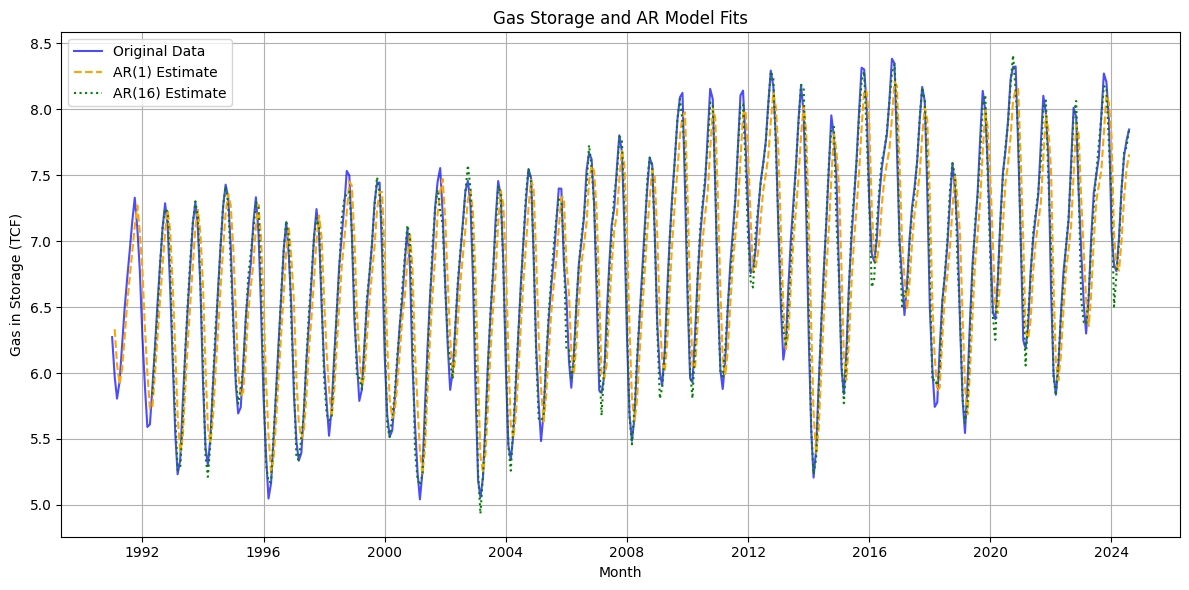

AR(1) Model Summary:
                            AutoReg Model Results                             
Dep. Variable:     gas_in_storage_tcf   No. Observations:                  404
Model:                     AutoReg(1)   Log Likelihood                -167.225
Method:               Conditional MLE   S.D. of innovations              0.366
Date:                Tue, 19 Nov 2024   AIC                            340.450
Time:                        15:10:50   BIC                            352.447
Sample:                             1   HQIC                           345.199
                                  404                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.7609      0.157      4.835      0.000       0.453       1.069
gas_in_storage_tcf.L1     0.8882      0.023     38.494      0.000       0.843

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg

# Load the data
data = pd.read_csv("gas_storage.csv")

# Convert "month" column to datetime
data['month'] = pd.to_datetime(data['month'], format='%b-%y')

# Sort data by date to ensure chronological order
data = data.sort_values(by='month').reset_index(drop=True)

# Extract the target variable
y = data['gas_in_storage_tcf']

# --- AR(1) Model ---
# Fit AR(1)
model_ar1 = AutoReg(y, lags=1, trend='c')  # Including an intercept
model_ar1_fit = model_ar1.fit()

# Get AR(1) fitted values and align with original data
fitted_ar1 = model_ar1_fit.fittedvalues
fitted_ar1_aligned = np.concatenate([np.full(1, np.nan), fitted_ar1])  # Add NaN for alignment

# --- Optimal Lag Selection ---
# Test models with different lags and choose the one with the smallest AIC
max_lags = 24  # Test up to 24 lags
aic_values = []
fitted_models = {}

for lags in range(1, max_lags + 1):
    model = AutoReg(y, lags=lags, trend='c')
    fitted_model = model.fit()
    aic_values.append(fitted_model.aic)
    fitted_models[lags] = fitted_model

# Find the optimal lag based on AIC
optimal_lags = aic_values.index(min(aic_values)) + 1
model_optimal_fit = fitted_models[optimal_lags]

# Get AR(optimal) fitted values and align with original data
fitted_optimal = model_optimal_fit.fittedvalues
fitted_optimal_aligned = np.concatenate([np.full(optimal_lags, np.nan), fitted_optimal])  # Add NaN for alignment

# --- Visualization ---
plt.figure(figsize=(12, 6))

# Plot original data
plt.plot(data['month'], y, label='Original Data', color='blue', alpha=0.7)

# Plot AR(1) fitted values
plt.plot(data['month'], fitted_ar1_aligned, label='AR(1) Estimate', color='orange', linestyle='--')

# Plot AR(optimal) fitted values
plt.plot(data['month'], fitted_optimal_aligned, label=f'AR({optimal_lags}) Estimate', color='green', linestyle=':')

plt.title('Gas Storage and AR Model Fits')
plt.xlabel('Month')
plt.ylabel('Gas in Storage (TCF)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Display AR model summaries
print("AR(1) Model Summary:")
print(model_ar1_fit.summary())

print(f"\nOptimal Lag AR Model (AR({optimal_lags})) Summary:")
print(model_optimal_fit.summary())


### Forecasts for AR(1)

For an AR(1) process, the one-step-ahead forecast is:

$$
\widehat{y}_{t+1|t} = \phi_0 + \phi_1 y_t
$$

The two-step-ahead forecast is:

$$
\widehat{y}_{t+2|t} = \phi_0 + \phi_1 \widehat{y}_{t+1|t}.
$$

Substituting $\widehat{y}_{t+1|t}$, we get:

$$
\widehat{y}_{t+2|t} = \phi_0 + \phi_1 (\phi_0 + \phi_1 y_t) = \phi_0 (1 + \phi_1) + \phi_1^2 y_t.
$$

For \( h \)-steps ahead, the general forecast is:

$$
\widehat{y}_{t+h|t} = \phi_0 \sum_{i=0}^{h-1} \phi_1^i + \phi_1^h y_t.
$$


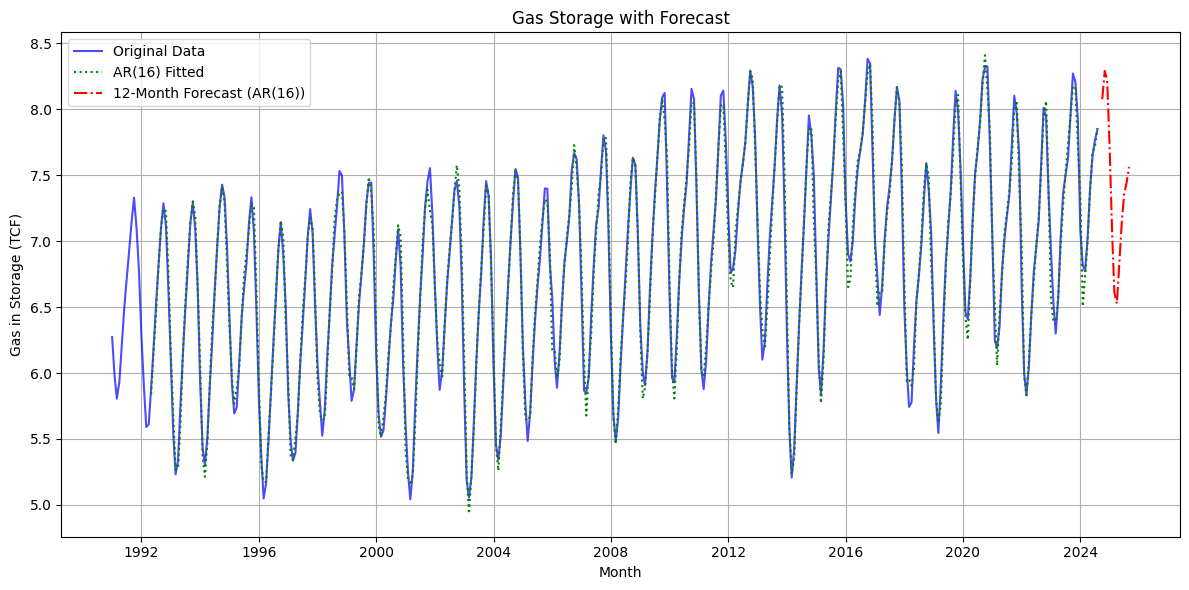

In [ ]:
# Generate a 12-month forecast using the optimal model
forecast_steps = 12
forecast = model_optimal_fit.predict(start=len(y), end=len(y) + forecast_steps - 1)

# Extend the original dates for the forecast
forecast_months = pd.date_range(start=data['month'].iloc[-1], periods=forecast_steps + 1, freq='ME')[1:]

# Plot the forecast on top of the original data and fitted values
plt.figure(figsize=(12, 6))

# Plot original data
plt.plot(data['month'], y, label='Original Data', color='blue', alpha=0.7)

# Plot AR(optimal) fitted values
plt.plot(data['month'], fitted_optimal_aligned, label=f'AR({optimal_lags}) Fitted', color='green', linestyle=':')

# Plot the forecast
plt.plot(forecast_months, forecast, label=f'12-Month Forecast (AR({optimal_lags}))', color='red', linestyle='-.')

plt.title('Gas Storage with Forecast')
plt.xlabel('Month')
plt.ylabel('Gas in Storage (TCF)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


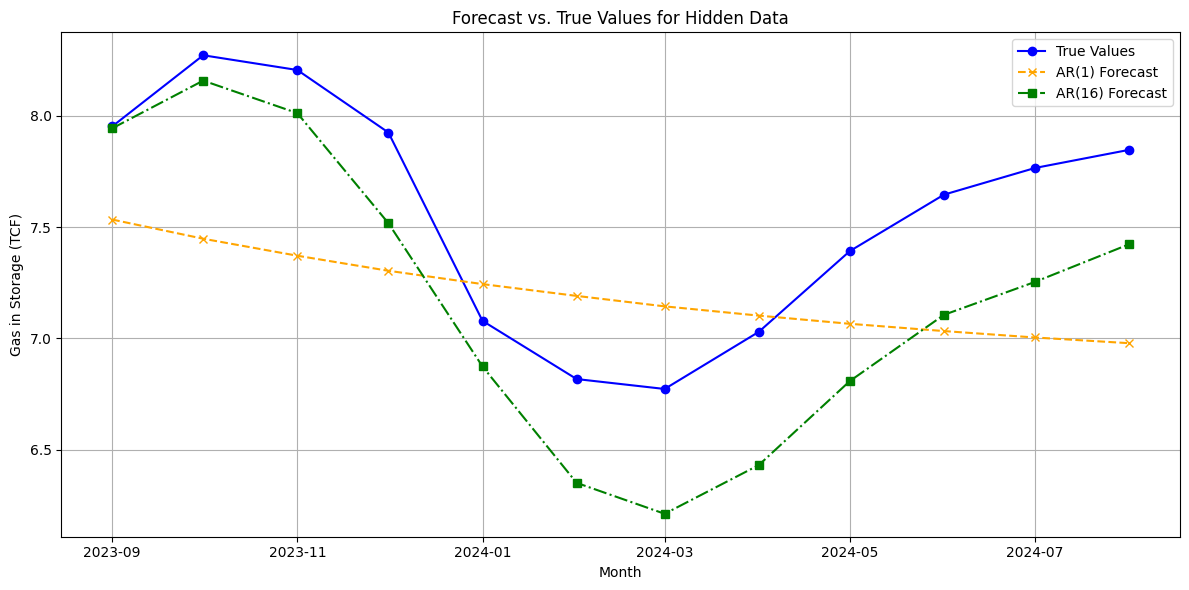

Mean Squared Error (AR(1)): 0.33876804878911315
Mean Squared Error (AR(16)): 0.18536048355224086


In [ ]:
from sklearn.metrics import mean_squared_error

# Hide the last 12 observations (split data into training and test sets)
train_data = y[:-12]
test_data = y[-12:]

# --- AR(1) Model ---
# Fit AR(1) on the training data
model_ar1 = AutoReg(train_data, lags=1, trend='c')
model_ar1_fit = model_ar1.fit()

# Forecast the hidden 12 months using AR(1)
forecast_ar1 = model_ar1_fit.predict(start=len(train_data), end=len(train_data) + 12 - 1)

# --- AR(16) Model ---
# Fit AR(16) on the training data
model_ar16 = AutoReg(train_data, lags=16, trend='c')
model_ar16_fit = model_ar16.fit()

# Forecast the hidden 12 months using AR(16)
forecast_ar16 = model_ar16_fit.predict(start=len(train_data), end=len(train_data) + 12 - 1)

# --- Visualization ---
plt.figure(figsize=(12, 6))

# Plot actual hidden values
plt.plot(data['month'][-12:], test_data, label='True Values', color='blue', marker='o')

# Plot AR(1) forecasts
plt.plot(data['month'][-12:], forecast_ar1, label='AR(1) Forecast', color='orange', linestyle='--', marker='x')

# Plot AR(16) forecasts
plt.plot(data['month'][-12:], forecast_ar16, label='AR(16) Forecast', color='green', linestyle='-.', marker='s')

plt.title('Forecast vs. True Values for Hidden Data')
plt.xlabel('Month')
plt.ylabel('Gas in Storage (TCF)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# --- Calculate MSE ---
mse_ar1 = mean_squared_error(test_data, forecast_ar1)
mse_ar16 = mean_squared_error(test_data, forecast_ar16)

# Display the MSEs
print("Mean Squared Error (AR(1)):", mse_ar1)
print("Mean Squared Error (AR(16)):", mse_ar16)


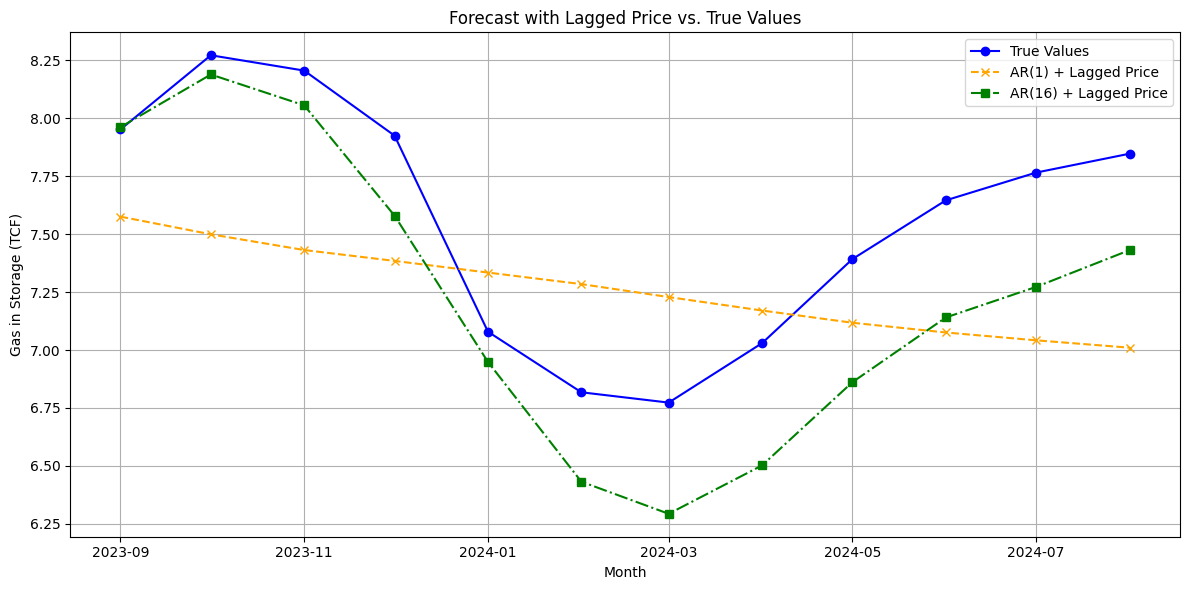

Mean Squared Error (AR(1) + Lagged Price): 0.3141499723280225
Mean Squared Error (AR(16) + Lagged Price): 0.14825070512249813


In [ ]:
# Add a 12-month lagged price variable
data['price_lag12'] = data['price'].shift(12)

# Drop rows where lagged price is NaN (first 12 rows will be NaN due to lagging)
data = data.dropna().reset_index(drop=True)

# Update training and test sets
train_data = data[:-12]  # Exclude the last 12 months for training
test_data = data[-12:]   # Last 12 months are for testing

# Extract the target variable and lagged price for the AR models
y_train = train_data['gas_in_storage_tcf']
price_lag12_train = train_data['price_lag12']
y_test = test_data['gas_in_storage_tcf']
price_lag12_test = test_data['price_lag12']

# --- AR(1) with Lagged Price ---
from statsmodels.tsa.ar_model import AutoReg

# Fit AR(1) model with lagged price
X_train_ar1 = price_lag12_train  # Exogenous variable
model_ar1 = AutoReg(y_train, lags=1, trend='c', exog=X_train_ar1)
model_ar1_fit = model_ar1.fit()

# Forecast the hidden 12 months using AR(1)
forecast_ar1 = model_ar1_fit.predict(start=len(y_train), end=len(y_train) + 12 - 1, exog_oos=price_lag12_test)

# --- AR(16) with Lagged Price ---
# Fit AR(16) model with lagged price
X_train_ar16 = price_lag12_train  # Exogenous variable
model_ar16 = AutoReg(y_train, lags=16, trend='c', exog=X_train_ar16)
model_ar16_fit = model_ar16.fit()

# Forecast the hidden 12 months using AR(16)
forecast_ar16 = model_ar16_fit.predict(start=len(y_train), end=len(y_train) + 12 - 1, exog_oos=price_lag12_test)

# --- Visualization ---
plt.figure(figsize=(12, 6))

# Plot actual hidden values
plt.plot(test_data['month'], y_test, label='True Values', color='blue', marker='o')

# Plot AR(1) forecasts
plt.plot(test_data['month'], forecast_ar1, label='AR(1) + Lagged Price', color='orange', linestyle='--', marker='x')

# Plot AR(16) forecasts
plt.plot(test_data['month'], forecast_ar16, label='AR(16) + Lagged Price', color='green', linestyle='-.', marker='s')

plt.title('Forecast with Lagged Price vs. True Values')
plt.xlabel('Month')
plt.ylabel('Gas in Storage (TCF)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# --- Calculate MSE ---
from sklearn.metrics import mean_squared_error

mse_ar1 = mean_squared_error(y_test, forecast_ar1)
mse_ar16 = mean_squared_error(y_test, forecast_ar16)

print("Mean Squared Error (AR(1) + Lagged Price):", mse_ar1)
print("Mean Squared Error (AR(16) + Lagged Price):", mse_ar16)


X_train data types:
 price_lag12        float64
month_August       float64
month_August       float64
month_August       float64
month_August       float64
                    ...   
month_September    float64
month_September    float64
month_September    float64
month_September    float64
month_September    float64
Length: 276, dtype: object
Final shape of X_train: (332, 276)
Final shape of y_train: (332,)


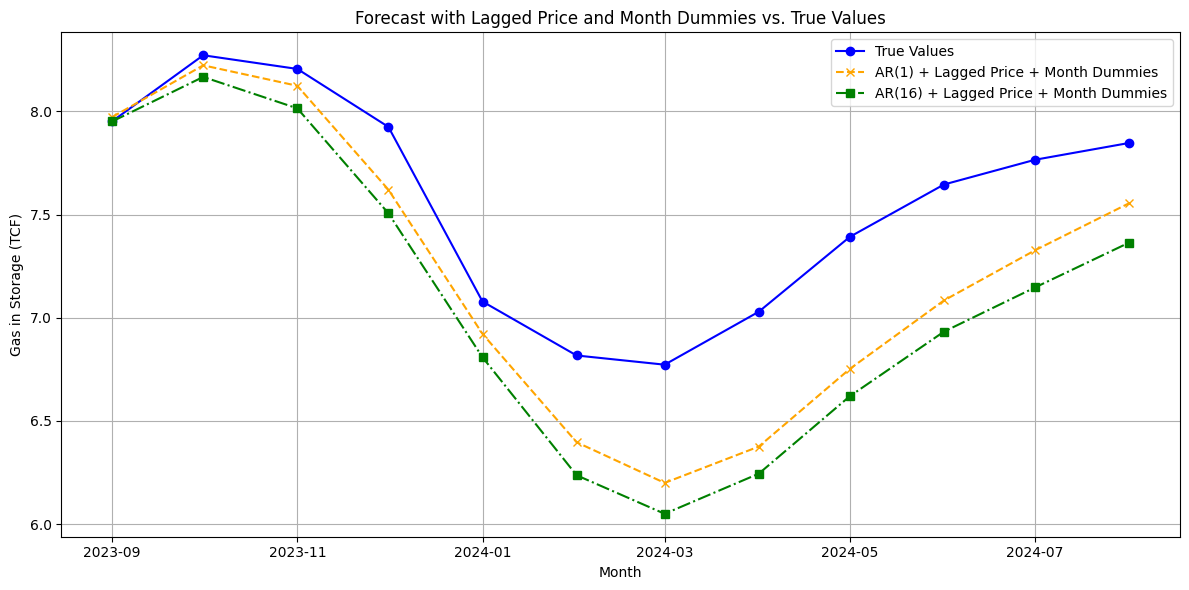

Mean Squared Error (AR(1) + Lagged Price + Month Dummies): 0.17182811519755026
Mean Squared Error (AR(16) + Lagged Price + Month Dummies): 0.29103582752297924


In [ ]:
# Ensure 'month' is in datetime format
data['month'] = pd.to_datetime(data['month'])

# Extract month names for dummies
data['month_name'] = data['month'].dt.month_name()

# Create dummy variables for months
data = pd.get_dummies(data, columns=['month_name'], prefix='month', drop_first=True)

# Create lagged price variable (12-month lag)
data['price_lag12'] = data['price'].shift(12)

# Drop rows with NaN (first 12 rows due to lagging and month dummies creation)
data = data.dropna().reset_index(drop=True)

# Split into training and test sets
train_data = data[:-12]  # Exclude the last 12 months for training
test_data = data[-12:]   # Last 12 months are for testing

# Define target and exogenous variables
y_train = train_data['gas_in_storage_tcf']
y_test = test_data['gas_in_storage_tcf']
X_train = train_data[['price_lag12'] + [col for col in train_data.columns if col.startswith('month_')]]
X_test = test_data[['price_lag12'] + [col for col in test_data.columns if col.startswith('month_')]]

# Ensure all variables in X_train and X_test are numeric
X_train = X_train.astype(float)
X_test = X_test.astype(float)

# Debug: Check final data types and shapes
print("X_train data types:\n", X_train.dtypes)
print("Final shape of X_train:", X_train.shape)
print("Final shape of y_train:", y_train.shape)

# --- AR(1) with Lagged Price and Month Dummies ---
# Fit AR(1) model
model_ar1 = AutoReg(y_train, lags=1, trend='c', exog=X_train)
model_ar1_fit = model_ar1.fit()

# Forecast the hidden 12 months using AR(1)
forecast_ar1 = model_ar1_fit.predict(start=len(y_train), end=len(y_train) + 12 - 1, exog_oos=X_test)

# --- AR(16) with Lagged Price and Month Dummies ---
# Fit AR(16) model
model_ar16 = AutoReg(y_train, lags=16, trend='c', exog=X_train)
model_ar16_fit = model_ar16.fit()

# Forecast the hidden 12 months using AR(16)
forecast_ar16 = model_ar16_fit.predict(start=len(y_train), end=len(y_train) + 12 - 1, exog_oos=X_test)

# --- Visualization ---
plt.figure(figsize=(12, 6))

# Plot actual hidden values
plt.plot(test_data['month'], y_test, label='True Values', color='blue', marker='o')

# Plot AR(1) forecasts
plt.plot(test_data['month'], forecast_ar1, label='AR(1) + Lagged Price + Month Dummies', color='orange', linestyle='--', marker='x')

# Plot AR(16) forecasts
plt.plot(test_data['month'], forecast_ar16, label='AR(16) + Lagged Price + Month Dummies', color='green', linestyle='-.', marker='s')

plt.title('Forecast with Lagged Price and Month Dummies vs. True Values')
plt.xlabel('Month')
plt.ylabel('Gas in Storage (TCF)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# --- Calculate MSE ---
mse_ar1 = mean_squared_error(y_test, forecast_ar1)
mse_ar16 = mean_squared_error(y_test, forecast_ar16)

print("Mean Squared Error (AR(1) + Lagged Price + Month Dummies):", mse_ar1)
print("Mean Squared Error (AR(16) + Lagged Price + Month Dummies):", mse_ar16)
